# Gevorderde Verkennende Analyse

Welkom bij deze gevorderde verkennende analyse van de Student Performance dataset. In deze opdracht gaan we systematisch de volledige dataset verkennen en ons richten op het voorbereiden van de gegevens voor een machine learning-oplossing. De dataset bevat 34 variabelen die verschillende aspecten van de studenten en hun prestaties op school vertegenwoordigen.

Doelstelling:
Het hoofddoel van deze analyse is om inzichten te verkrijgen die nuttig zullen zijn bij het ontwikkelen van een machine learning-model om de afhankelijke variabele 'G3' te voorspellen. We willen de patronen en relaties tussen de variabelen begrijpen, uitschieters identificeren, ontbrekende waarden behandelen en relevante functies selecteren voor het trainen van ons model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm, chi2_contingency, f_oneway
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

# 2) Data, metadata, variabelen indelen

Zoals altijd begin ik met het inladen van de dataset. Ik heb de variabele naam dezelfde naam als bij de basis verkennende analyse. Alleen heb ik er nu ook GV bijgezet

In [2]:
student_performance_GV_data = pd.read_csv("student_performance_gevorderd.csv",sep=',')

student_performance_GV_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,course
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mat
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,3,3,1,1,3,4,5,5,6,mat
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,3,2,2,3,3,10,7,8,10,mat
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,2,2,1,1,5,2,15,14,15,mat
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,3,2,1,2,5,4,6,10,10,mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19.0,R,GT3,T,2.0,3.0,services,other,...,4,2,1,2,5,4,10,11,10,por
1040,MS,F,18.0,U,LE3,T,3.0,1.0,teacher,services,...,3,4,1,1,1,4,15,15,16,por
1041,MS,F,18.0,U,GT3,T,1.0,1.0,other,other,...,1,1,1,1,5,6,11,12,9,por
1042,MS,M,17.0,U,LE3,T,NaN,NaN,services,services,...,4,5,3,4,2,6,10,10,10,por


In [3]:
student_performance_GV_data.shape

(1044, 34)

In [4]:
list(student_performance_GV_data)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'course']

In [5]:
student_performance_GV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   object 
 1   sex         1044 non-null   object 
 2   age         1023 non-null   float64
 3   address     1044 non-null   object 
 4   famsize     1044 non-null   object 
 5   Pstatus     1044 non-null   object 
 6   Medu        1016 non-null   float64
 7   Fedu        1016 non-null   float64
 8   Mjob        1044 non-null   object 
 9   Fjob        1044 non-null   object 
 10  reason      1044 non-null   object 
 11  guardian    971 non-null    object 
 12  traveltime  1044 non-null   int64  
 13  studytime   1044 non-null   int64  
 14  failures    1044 non-null   int64  
 15  schoolsup   1044 non-null   object 
 16  famsup      1044 non-null   object 
 17  paid        1044 non-null   object 
 18  activities  1044 non-null   object 
 19  nursery     1044 non-null  

We zien hier dat er veel meer variabelen zijn dan bij de basis analyse. Om dit beter leesbaar te maken, maak ik weer een data dictionary aan. 

| Variabele naam | Datatype | Numeriek/Categorisch | Soort variabele | Mogelijke waarden                                                                               |
|----------------|----------|----------------------|-----------------|--------------------------------------------------------------------------------------------------|
| school         | String   | Categorisch          | Nominaal        | "GP" - Gabriel Pereira of "MS" - Mousinho da Silveira                                             |
| sex            | String   | Categorisch          | Binair          | "F" - female of "M" - male                                                                     |
| age            | Integer  | Numeriek              | Continueus      | Van 15 tot 22                                                                                  |
| address        | String   | Categorisch          | Nominaal        | "U" - urban of "R" - rural                                                                     |
| famsize        | String   | Categorisch          | Nominaal        | "LE3" - less or equal to 3 of "GT3" - greater than 3                                            |
| Pstatus        | String   | Categorisch          | Nominaal        | "T" - living together of "A" - apart                                                           |
| Medu           | Integer  | Numeriek              | Ordinaal        | 0 - none, 1 - primary education, 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education |
| Fedu           | Integer  | Numeriek              | Ordinaal        | 0 - none, 1 - primary education, 2 - 5th to 9th grade, 3 - secondary education, 4 - higher education |
| Mjob           | String   | Categorisch          | Nominaal        | Verschillende beroepen                                                                        |
| Fjob           | String   | Categorisch          | Nominaal        | Verschillende beroepen                                                                        |
| reason         | String   | Categorisch          | Nominaal        | "home", "reputation", "course", of "other"                                                     |
| guardian       | String   | Categorisch          | Nominaal        | Verschillende voogden                                                                        |
| traveltime     | Integer  | Numeriek              | Ordinaal        | 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, 4 - >1 hour                              |
| studytime      | Integer  | Numeriek              | Ordinaal        | 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, 4 - >10 hours                                |
| failures       | Integer  | Numeriek              | Ordinaal        | n if 1<=n<3, else 4                                                                           |
| schoolsup      | String   | Categorisch          | Binair          | "yes" of "no"                                                                                  |
| famsup         | String   | Categorisch          | Binair          | "yes" of "no"                                                                                  |
| paid           | String   | Categorisch          | Binair          | "yes" of "no"                                                                                  |
| activities     | String   | Categorisch          | Binair          | "yes" of "no"                                                                                  |
| nursery        | String   | Categorisch          | Binair          | "yes" of "no"                                                                                  |
| higher         | String   | Categorisch          | Binair          | "yes" of "no"                                                                                  |
| internet       | String   | Categorisch          | Binair          | "yes" of "no"                                                                                  |
| romantic       | String   | Categorisch          | Binair          | "yes" of "no"                                                                                  |
| famrel         | Integer  | Numeriek              | Ordinaal        | Van 1 - zeer slecht tot 5 - uitstekend                                                        |
| freetime       | Integer  | Numeriek              | Ordinaal        | Van 1 - zeer laag tot 5 - zeer hoog                                                           |
| goout          | Integer  | Numeriek              | Ordinaal        | Van 1 - zeer laag tot 5 - zeer hoog                                                           |
| Dalc           | Integer  | Numeriek              | Ordinaal        | Van 1 - zeer laag tot 5 - zeer hoog                                                           |
| Walc           | Integer  | Numeriek              | Ordinaal        | Van 1 - zeer laag tot 5 - zeer hoog                                                           |
| health         | Integer  | Numeriek              | Ordinaal        | Van 1 - zeer slecht tot 5 - zeer goed                                                          |
| absences       | Integer  | Numeriek              | Continueus      | Van 0 tot 93                                                                                  |
| G1             | Integer  | Numeriek              | Continueus      | Van 0 tot 20                                                                                  |
| G2             | Integer  | Numeriek              | Continueus      | Van 0 tot 20                                                                                  |
| G3             | Integer  | Numeriek              | Continueus      | Van 0 tot 20                                                                                  |
| course         | String   | Categorisch          | Nominaal        | "Portuguese" of "Math"                                                                       |


Nu ga ik de data opsplitsen in lijsten waarin ze horen. 

We hebben 3 lijsten. 

1. Afhankelijk
2. categorisch
3. numeriek

In [6]:
afhankelijk_var = ["G1", "G2", "G3"]
categorisch_var = ["address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian", "traveltime", "studytime", "schoolsup", "paid", "activities", "nursery", "higher", "internet", "romantic", "school", "sex", "course"] 
numeriek_var = ["age", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences"]

In [7]:
student_performance_GV_data.isnull().sum()

school         0
sex            0
age           21
address        0
famsize        0
Pstatus        0
Medu          28
Fedu          28
Mjob           0
Fjob           0
reason         0
guardian      73
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
course         0
dtype: int64

# 3) Individuele variabelen
## Afhankelijke variabelen

We gaan nu de afhankelijke variabelen bekijken met een frequentie verdeling om een beter beeld te krijgen.

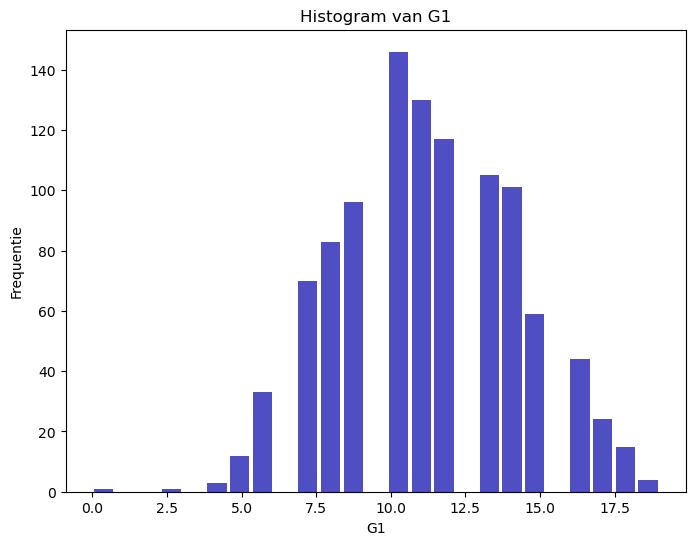

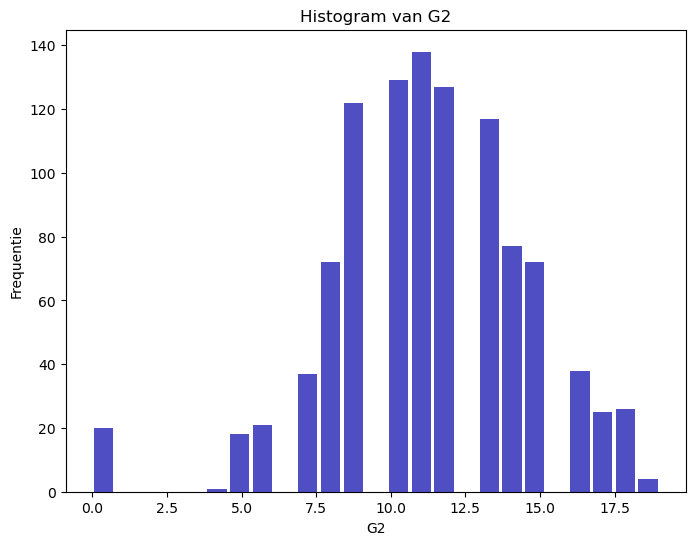

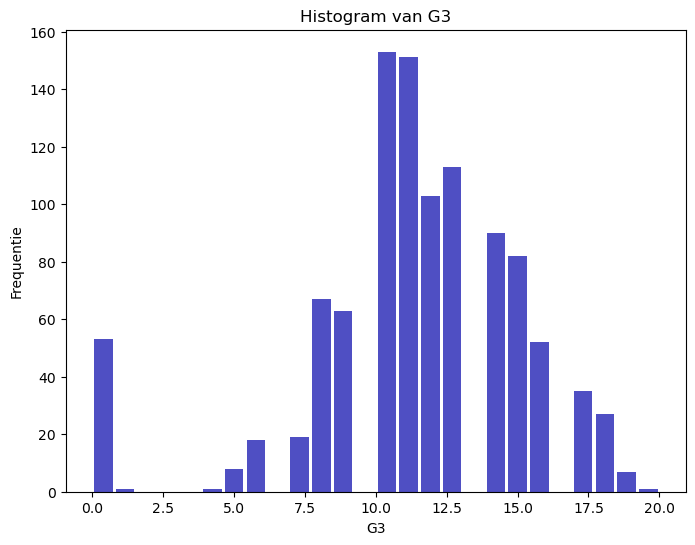

In [8]:
for var in afhankelijk_var:
    plt.figure(figsize=(8, 6))
    plt.hist(student_performance_GV_data[var], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.title(f'Histogram van {var}')
    plt.xlabel(var)
    plt.ylabel('Frequentie')
    plt.show()

We zien dat bij G1 er geen outliers zijn en het een goede normale verdeling heeft, G2 heeft rond 0 wat outliers zitten en heeft voor de rest een prima normaal verdeling. En bij G3 is de normaal verdeling redelijk en zijn er bij 0 veel outliers

In [9]:
for var in afhankelijk_var:
    freq_table = pd.value_counts(student_performance_GV_data[var]).reset_index()
    freq_table.columns = [var, 'Frequentie']
    display(freq_table)

,G1,Frequentie
0,10,146
1,11,130
2,12,117
3,13,105
4,14,101
5,9,96
6,8,83
7,7,70
8,15,59
9,16,44


,G2,Frequentie
0,11,138
1,10,129
2,12,127
3,9,122
4,13,117
5,14,77
6,8,72
7,15,72
8,16,38
9,7,37


,G3,Frequentie
0,10,153
1,11,151
2,13,113
3,12,103
4,14,90
5,15,82
6,8,67
7,9,63
8,0,53
9,16,52


In [10]:
scores = student_performance_GV_data[['G1', 'G2', 'G3']]

gemiddelde_scores = scores.mean()

print (gemiddelde_scores)

G1    11.213602
G2    11.246169
G3    11.341954
dtype: float64


Hieruit kunnen we zien dat G3 gemiddeld de hoger scoort dan G1 en G2

### categorische variabelen

In [11]:
def plot_frequencies(data, vars, var_type, num_cols = 5, ord_cat_var_orders=None, remove_outliers=False):
    num_rows = len(vars) // num_cols
    if len(vars) % num_cols != 0:
        num_rows += 1

    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False, figsize=(num_cols * 3, num_rows * 3))

    for i, var in enumerate(vars):
        row = i // num_cols
        col = i % num_cols
        if var_type == "nom" or var_type == "ord_num":
            sns.countplot(ax=ax[row][col], data=data, x=var)
        elif var_type == "ord_cat":
            sns.countplot(ax=ax[row][col], data=data, x=var, order=ord_cat_var_orders[var])
        elif var_type == "num":
            if remove_outliers:
                largest_indices = data.nlargest(columns=var, n=10).index
                sns.histplot(ax=ax[row][col], data=data[~data.index.isin(largest_indices)], x=var)
            else:
                sns.histplot(ax=ax[row][col], data=data, x=var)
        else:
            raise Exception("Unknown var type {}". format(var_type))

        if len(ax[row][col].get_xticklabels()) > 5:
            ax[row][col].tick_params(axis='x', labelrotation=90)

    plt.tight_layout()
    plt.show()

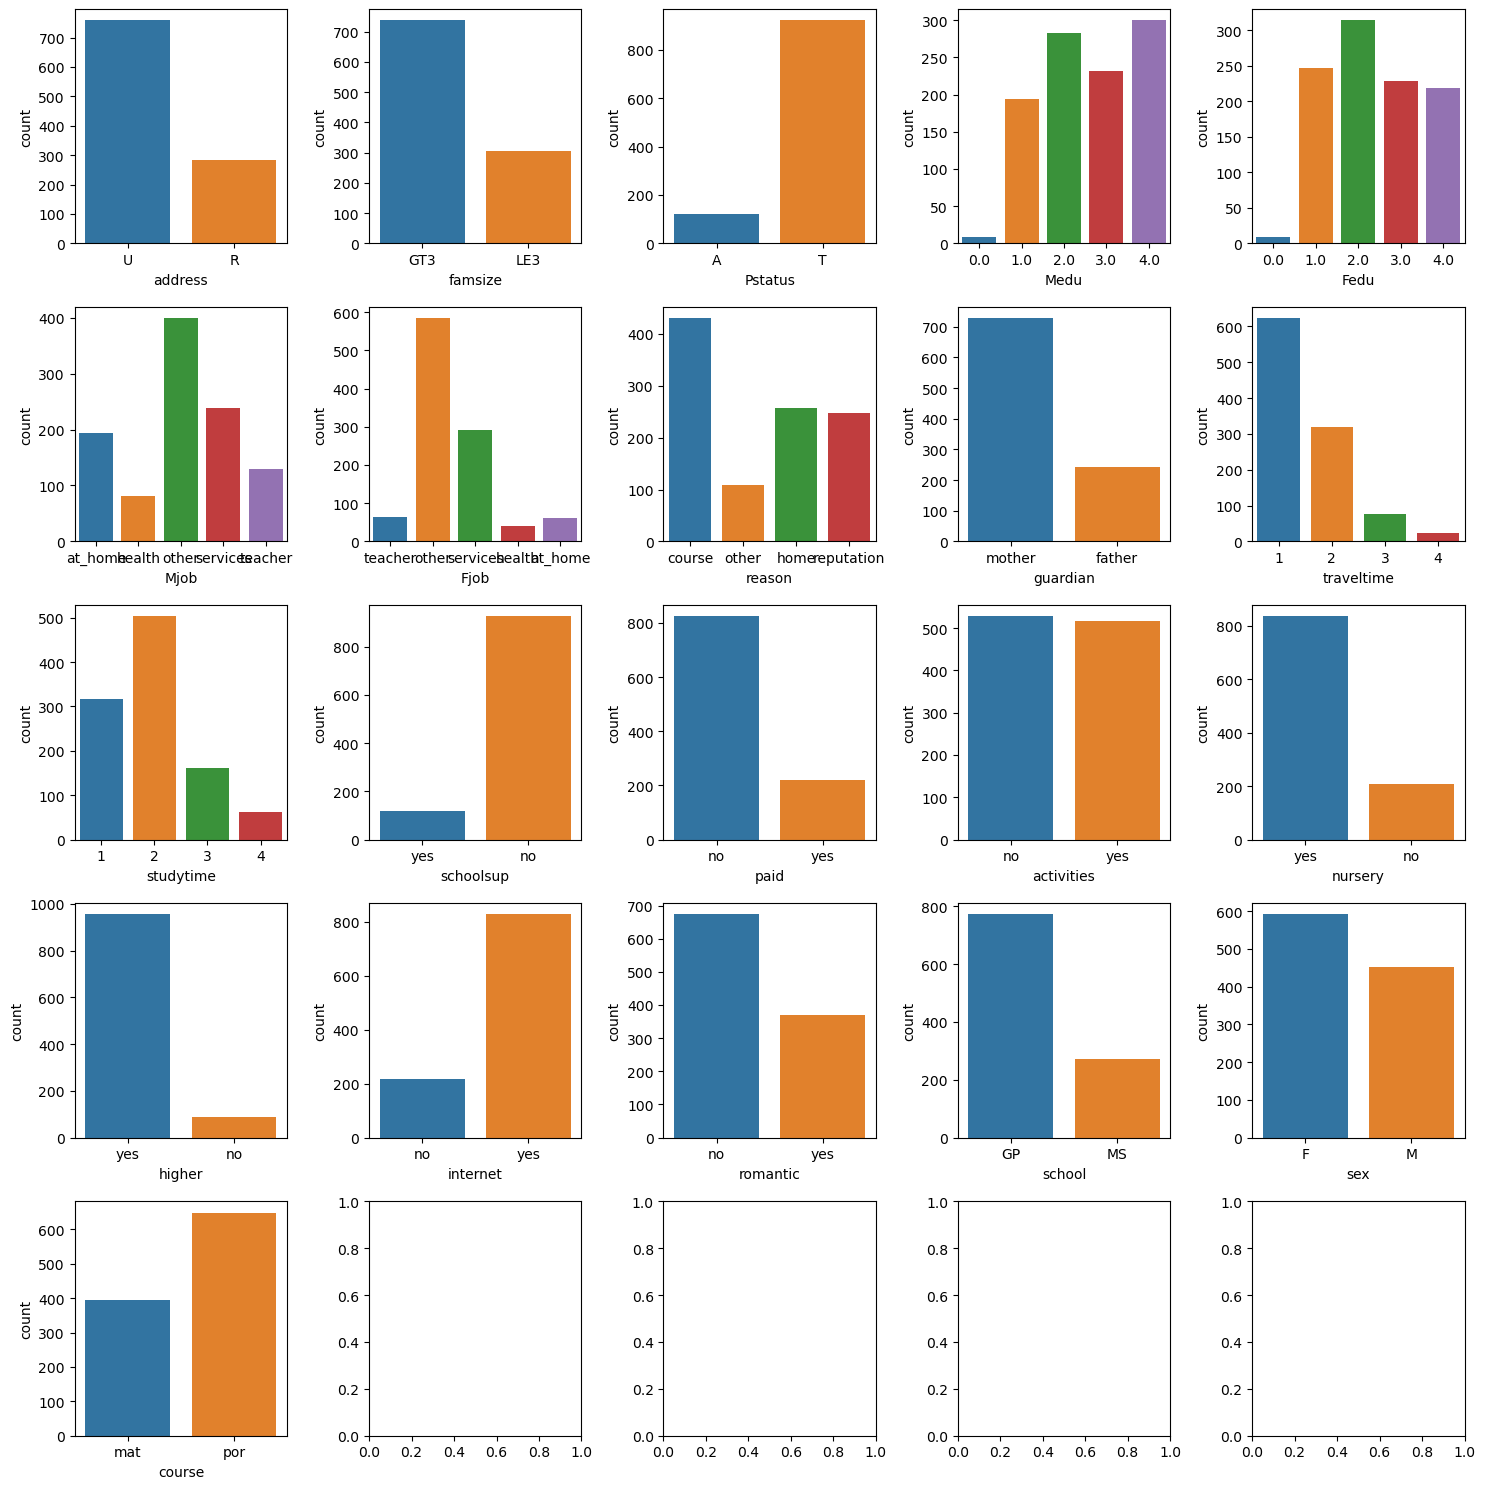

In [12]:
plot_frequencies(student_performance_GV_data, categorisch_var, var_type="nom")

Het eerste wat me echt opvalt is dat de address bij veel meer stedelijk is dan landelijk. Studenten hebben meer moeders als voogd dan vaders. Studenten hebben voor de school gekozen met grootste reden de course en er zijn meer meisjes dan jongens.

### numeriek variabelen

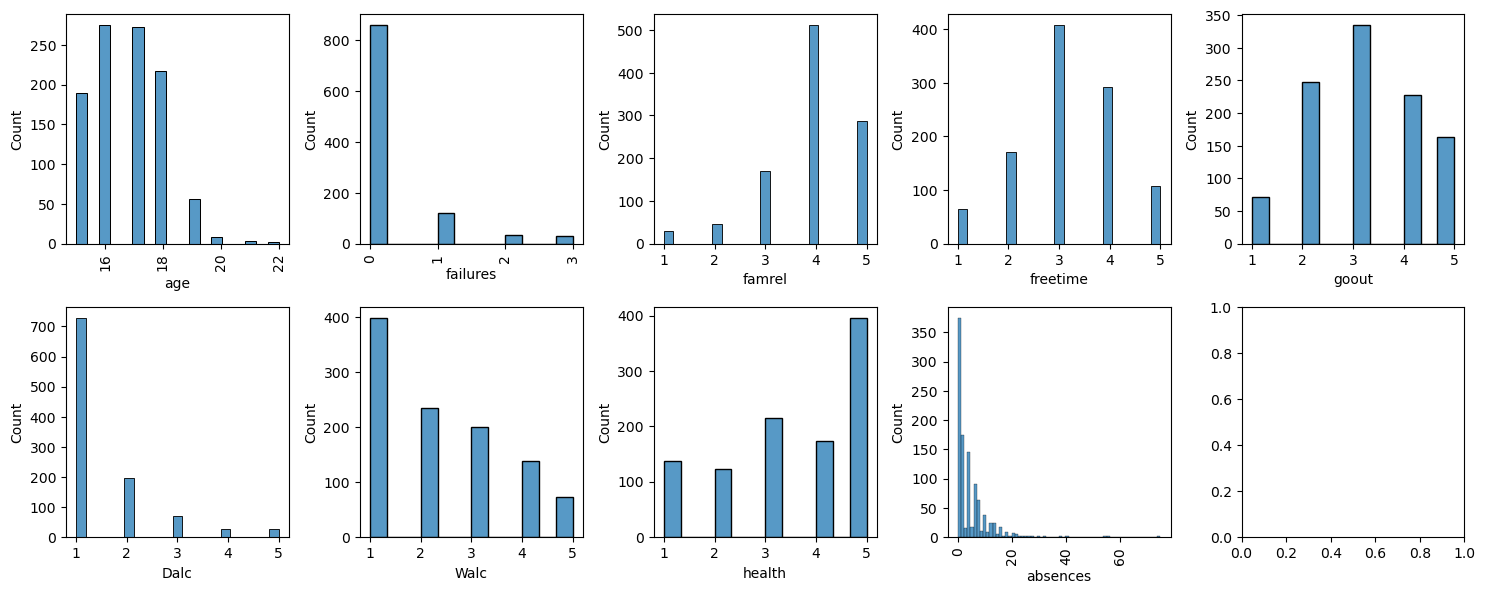

In [13]:
plot_frequencies(student_performance_GV_data, numeriek_var, var_type="num", remove_outliers=False)

Ik zie een paar normaal verdelingen ertussen. Absences heeft een grote rechtsscheve verdeling. Zien we ook bij age, failures en dalc 

# 4) Missing values

In deze sectie zal ik de dataset analyseren op ontbrekende waarden, waarbij ik specifiek onderscheid zal maken tussen variabelen die nullable (waarden kunnen bevatten) en not nullable (geen waarden kunnen bevatten) zijn. Door deze analyse kunnen we inzicht krijgen in de omvang van ontbrekende gegevens in de dataset en bepalen welke variabelen mogelijk imputatie of andere strategieën vereisen om de datakwaliteit te verbeteren.

In [14]:
missing_values = student_performance_GV_data.isnull().sum()

nullable_variables = ["age", "Medu", "Fedu", "guardian"]

not_nullable_variables = [var for var in student_performance_GV_data.columns if var not in nullable_variables]

missing_values_by_variable = missing_values[nullable_variables + not_nullable_variables]

print("Missing Values per Variable:")
print(missing_values_by_variable)

Missing Values per Variable:
age           21
Medu          28
Fedu          28
guardian      73
school         0
sex            0
address        0
famsize        0
Pstatus        0
Mjob           0
Fjob           0
reason         0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
course         0
dtype: int64


We zien dat er 4 variabelen zijn die values missen. Wat ik nu ga doen is een functie maken die deze missing values vult

In [15]:
class MissingValuesImputer(BaseEstimator, TransformerMixin):
    def __init__(self, nullable_vars, not_nullable_vars):
        self.nullable_vars = nullable_vars
        self.not_nullable_vars = not_nullable_vars
        self.age_mean = None
        self.medu_mode = None
        self.fedu_mode = None
        self.guardian_mode = None

    def fit(self, X, y=None):
        self.age_mean = X["age"].mean()
        self.medu_mode = X["Medu"].mode()[0]
        self.fedu_mode = X["Fedu"].mode()[0]
        self.guardian_mode = X["guardian"].mode()[0]

        return self

    def transform(self, X, y=None):
        X["age"].fillna(self.age_mean, inplace=True)
        X["Medu"].fillna(self.medu_mode, inplace=True)
        X["Fedu"].fillna(self.fedu_mode, inplace=True)
        X["guardian"].fillna(self.guardian_mode, inplace=True)

        return X

missing_values_imputer = MissingValuesImputer(nullable_vars=nullable_variables, not_nullable_vars=not_nullable_variables)
student_performance_GV_data_notNull = missing_values_imputer.fit_transform(student_performance_GV_data.copy())

De MissingValuesImputer klasse die ik heb gemaakt, behandelt ontbrekende waarden in specifieke variabelen van een dataset. Bij het instellen krijgt de klasse de lijsten nullable_vars en not_nullable_vars. In de fit-methode bereken ik statistische parameters zoals het gemiddelde en de modus op basis van niet-ontbrekende waarden van geselecteerde variabelen. Vervolgens gebruik ik deze parameters in de transform-methode om ontbrekende waarden in te vullen. Het resultaat is een dataset waarin ontbrekende waarden zijn aangepakt door ze te imputeren met statistisch afgeleide waarden.

In [16]:
print("Ontbrekende waarden in X na imputatie:")
print(student_performance_GV_data_notNull.isnull().sum())

Ontbrekende waarden in X na imputatie:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
course        0
dtype: int64


We zien nu dat de er geen null waardes meer in de dataset zitten na het uitvoeren van de script

# 6)	Combinaties van variabelen
## 6.1	De afhankelijke variabelen onderling

In deze sectie gaan we dieper in op de drie afhankelijke variabelen in de dataset, namelijk G1, G2 en G3. Door deze variabelen nader te onderzoeken, kunnen we inzicht krijgen in hun onderlinge relaties en patronen.

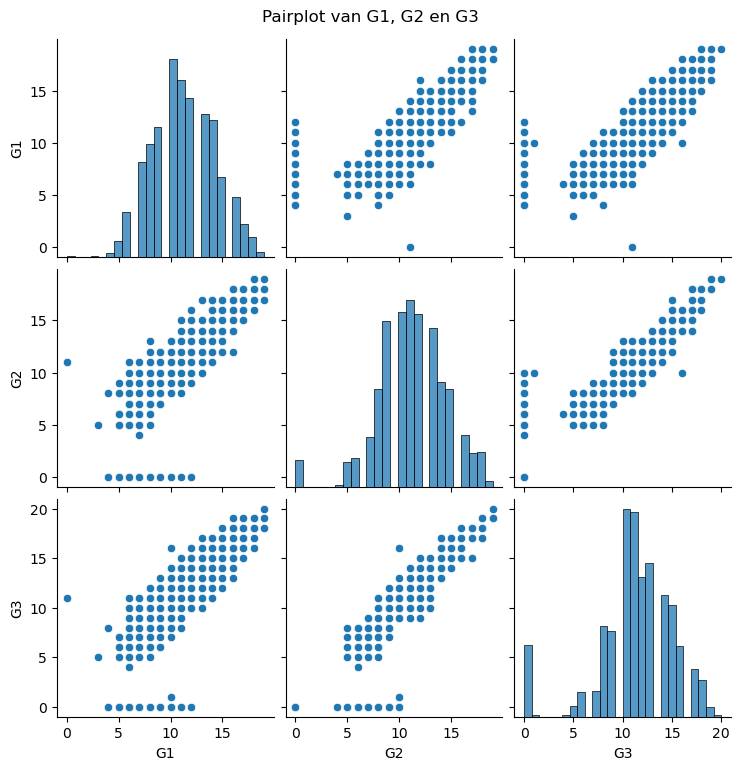

In [17]:
sns.pairplot(student_performance_GV_data[["G1", "G2", "G3"]])
plt.suptitle("Pairplot van G1, G2 en G3", y=1.02)
plt.show()

De pairplot toont een positieve correlatie tussen G1, G2 en G3, zoals duidelijk wordt door de opwaartse trend in de puntenwolk. Dit suggereert dat studenten die hogere cijfers behalen in G1 en G2 ook de neiging hebben om hogere cijfers te behalen in G3. De sterke samenhang tussen deze variabelen wijst op een consistente academische prestatie van de studenten over de verschillende evaluatiemomenten. Deze observatie kan van invloed zijn op verdere analyses en modellering, waarbij de voorspellende waarde van G1 en G2 voor G3 mogelijk relevant is.

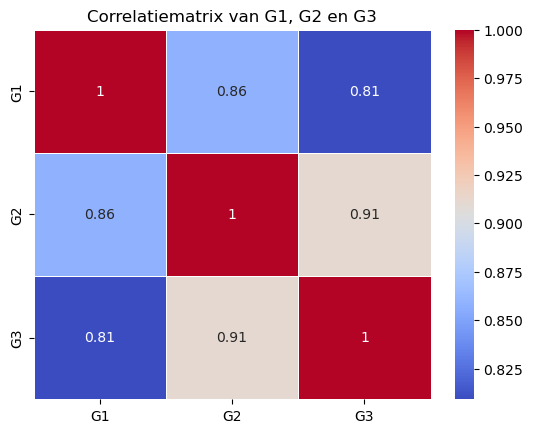

In [18]:
correlation_matrix = student_performance_GV_data[["G1", "G2", "G3"]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlatiematrix van G1, G2 en G3")
plt.show()

De correlatiematrix van G1, G2 en G3 toont sterke positieve correlaties tussen deze variabelen. Met correlatiecoëfficiënten variërend van 0.81 tot 0.91, duidt dit op een consistente en significante samenhang tussen de cijfers behaald in de verschillende evaluatiemomenten. De hoge correlatiewaarden geven aan dat studenten die goed presteren in de eerste en tweede evaluatie, over het algemeen ook goed presteren in de uiteindelijke beoordeling (G3). Deze sterke correlaties benadrukken de voorspellende waarde van G1 en G2 voor het eindresultaat en suggereren een consistente academische prestatie bij individuele studenten over meerdere termijnen.

## 6.2	De numerieke onafhankelijke variabelen


In deze sectie zullen we dieper ingaan op de numerieke onafhankelijke variabelen van de dataset. We zullen gebruikmaken van een heatmap om de onderlinge correlaties tussen deze variabelen visueel te analyseren. Deze heatmap biedt een overzicht van de sterkte en richting van de lineaire relaties tussen de verschillende numerieke kenmerken. Door deze analyse kunnen we patronen identificeren en begrijpen hoe de numerieke variabelen met elkaar interageren, wat waardevol is voor verdere interpretatie van de dataset.

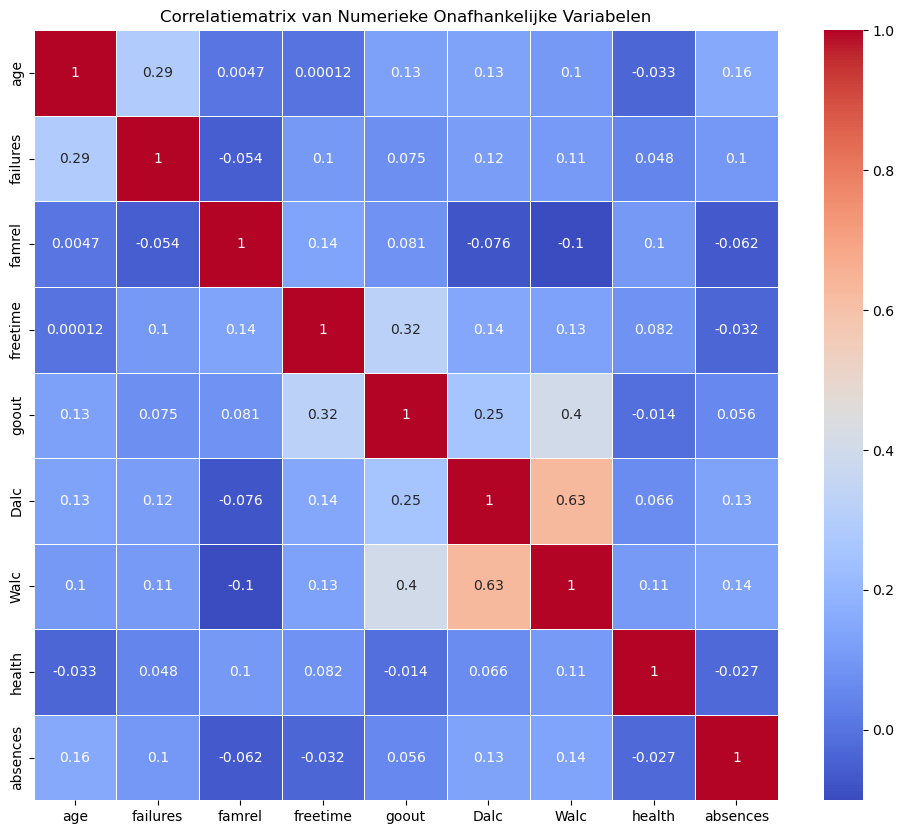

In [19]:
correlation_matrix_numeric = student_performance_GV_data[numeriek_var].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlatiematrix van Numerieke Onafhankelijke Variabelen")
plt.show()

0.00 tot 0.20: Zeer zwakke correlatie

0.20 tot 0.40: Zwakke correlatie

0.40 tot 0.60: Matige correlatie

0.60 tot 0.80: Sterke correlatie

0.80 tot 1.00: Zeer sterke correlatie

Dalc en Walc hebben een sterke correlatie. goout en Walc hebben een matige correlatie. voor de rest valt alles onder zwak of lager

## 6.4	De afhankelijke variabele G3 en de onafhankelijke variabelen


In deze sectie richten we ons specifiek op de afhankelijke variabele G3 en vergelijken we deze met alle onafhankelijke variabelen in de dataset. Door middel van een reeks univariate analyses zullen we de individuele invloed van elke onafhankelijke variabele op G3 verkennen. 

Deze functie, genaamd plot_y_dependencies, is door mij gemaakt om snel inzicht te krijgen in hoe numerieke variabelen zich verhouden tot de eindexamenscores (G3) in onze dataset. De grafieken die worden gegenereerd, laten visueel zien of er een verband is tussen hogere of lagere waarden in een numerieke variabele en de bijbehorende examenresultaten.

In [20]:
def plot_y_dependencies(data, vars, var_type, num_cols=5, remove_outliers=False):
    num_rows = len(vars) // num_cols
    if len(vars) % num_cols != 0:
        num_rows += 1

    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False, figsize=(num_cols * 3, num_rows * 4))

    for i, var in enumerate(vars):
        row = i // num_cols
        col = i % num_cols
        if var_type == "num":
            if remove_outliers:
                largest_indices = data.nlargest(columns=var, n=10).index
                sns.regplot(ax=ax[row][col], data=data[~data.index.isin(largest_indices)], x=var, y="G3")
        elif var_type == "nom" or var_type == "cat":
            sns.boxplot(ax=ax[row][col], data=data, x=var, y="G3")
            if len(ax[row][col].get_xticklabels()) > 5:
                ax[row][col].tick_params(axis='x', labelrotation=90)
        else:
            raise Exception("Unknown var type {}". format(var_type))

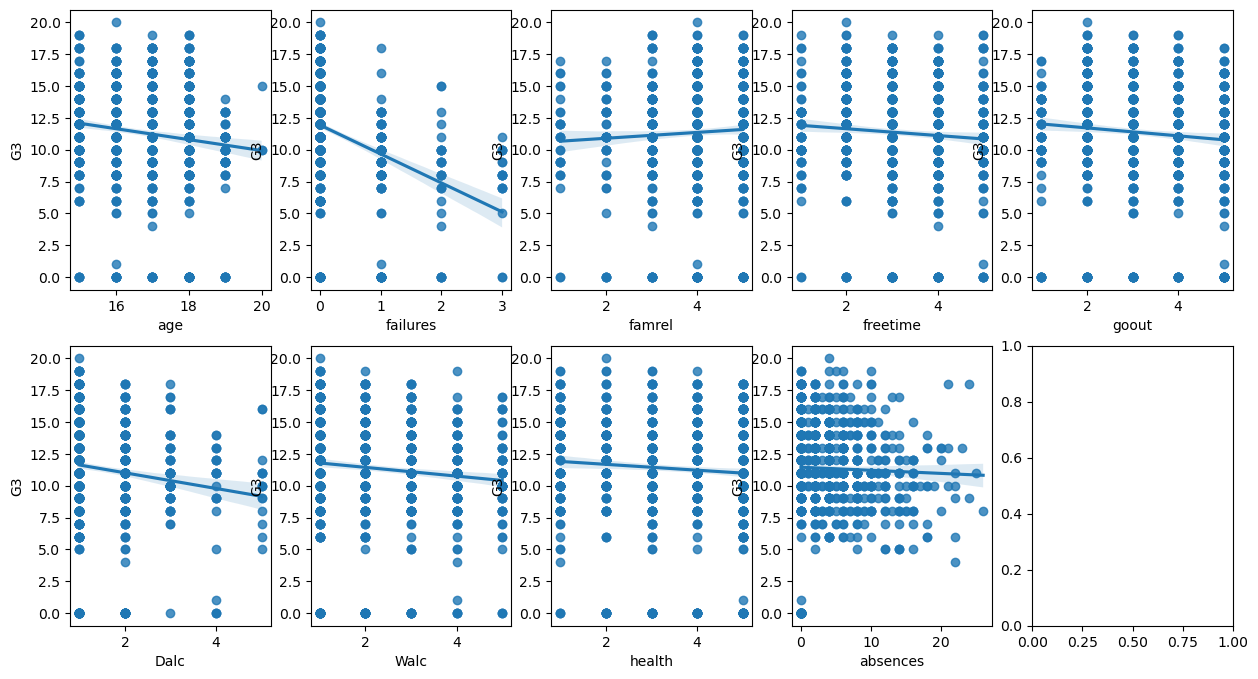

In [21]:
plot_y_dependencies(student_performance_GV_data, numeriek_var, var_type="num", remove_outliers=True)

Om te kijken welke variabele het meeste invloed heeft op G3. Zal ik de correlatie coefficient berekenen. Dat doe ik met de formule hieronder.

In [22]:
corrs = [student_performance_GV_data["G3"].corr(student_performance_GV_data[var], method="spearman") for var in numeriek_var]

corrs_df = pd.DataFrame({"Variabele": numeriek_var, "Correlatie coëfficiënt": corrs})
corrs_df["AbsCorr"] = corrs_df["Correlatie coëfficiënt"].abs()
corrs_df_sorted = corrs_df.sort_values("AbsCorr", ascending=False)[["Variabele", "Correlatie coëfficiënt"]]

print(corrs_df_sorted)

  Variabele  Correlatie coëfficiënt
1  failures               -0.412660
5      Dalc               -0.171879
6      Walc               -0.149330
4     goout               -0.120097
0       age               -0.113280
8  absences               -0.108972
3  freetime               -0.081827
7    health               -0.080785
2    famrel                0.049388


Failures (-0.412660): Er is een matig negatief verband tussen het aantal eerdere mislukkingen en de eindexamenscores. Hogere aantallen mislukkingen correleren met lagere scores.

Dalc (-0.171879) en Walc (-0.149330): Er is een zwak negatief verband tussen zowel het dagelijkse alcoholgebruik (Dalc) als het weekendalcoholgebruik (Walc) en de eindexamenscores. Hoger alcoholgebruik correleert met iets lagere scores.

Goout (-0.120097): Er is een zwak negatief verband tussen het uitgaan met vrienden en de eindexamenscores. Vaker uitgaan correleert met iets lagere scores.

Age (-0.113280): Er is een zwak negatief verband tussen leeftijd en eindexamenscores. Oudere studenten hebben iets lagere scores.

Absences (-0.108972): Er is een zwak negatief verband tussen het aantal gemiste schooldagen en de eindexamenscores. Meer gemiste dagen correleren met iets lagere scores.

Freetime (-0.081827) en Health (-0.080785): Er zijn zwakke negatieve verbanden tussen vrije tijd, gezondheid en eindexamenscores. Minder vrije tijd en slechtere gezondheid correleren met iets lagere scores.

Famrel (0.049388): Er is een zwak positief verband tussen de familierelaties en eindexamenscores. Betere familierelaties correleren met iets hogere scores.

Nu gaan we naar de categorische variabelen kijken met een boxplot.

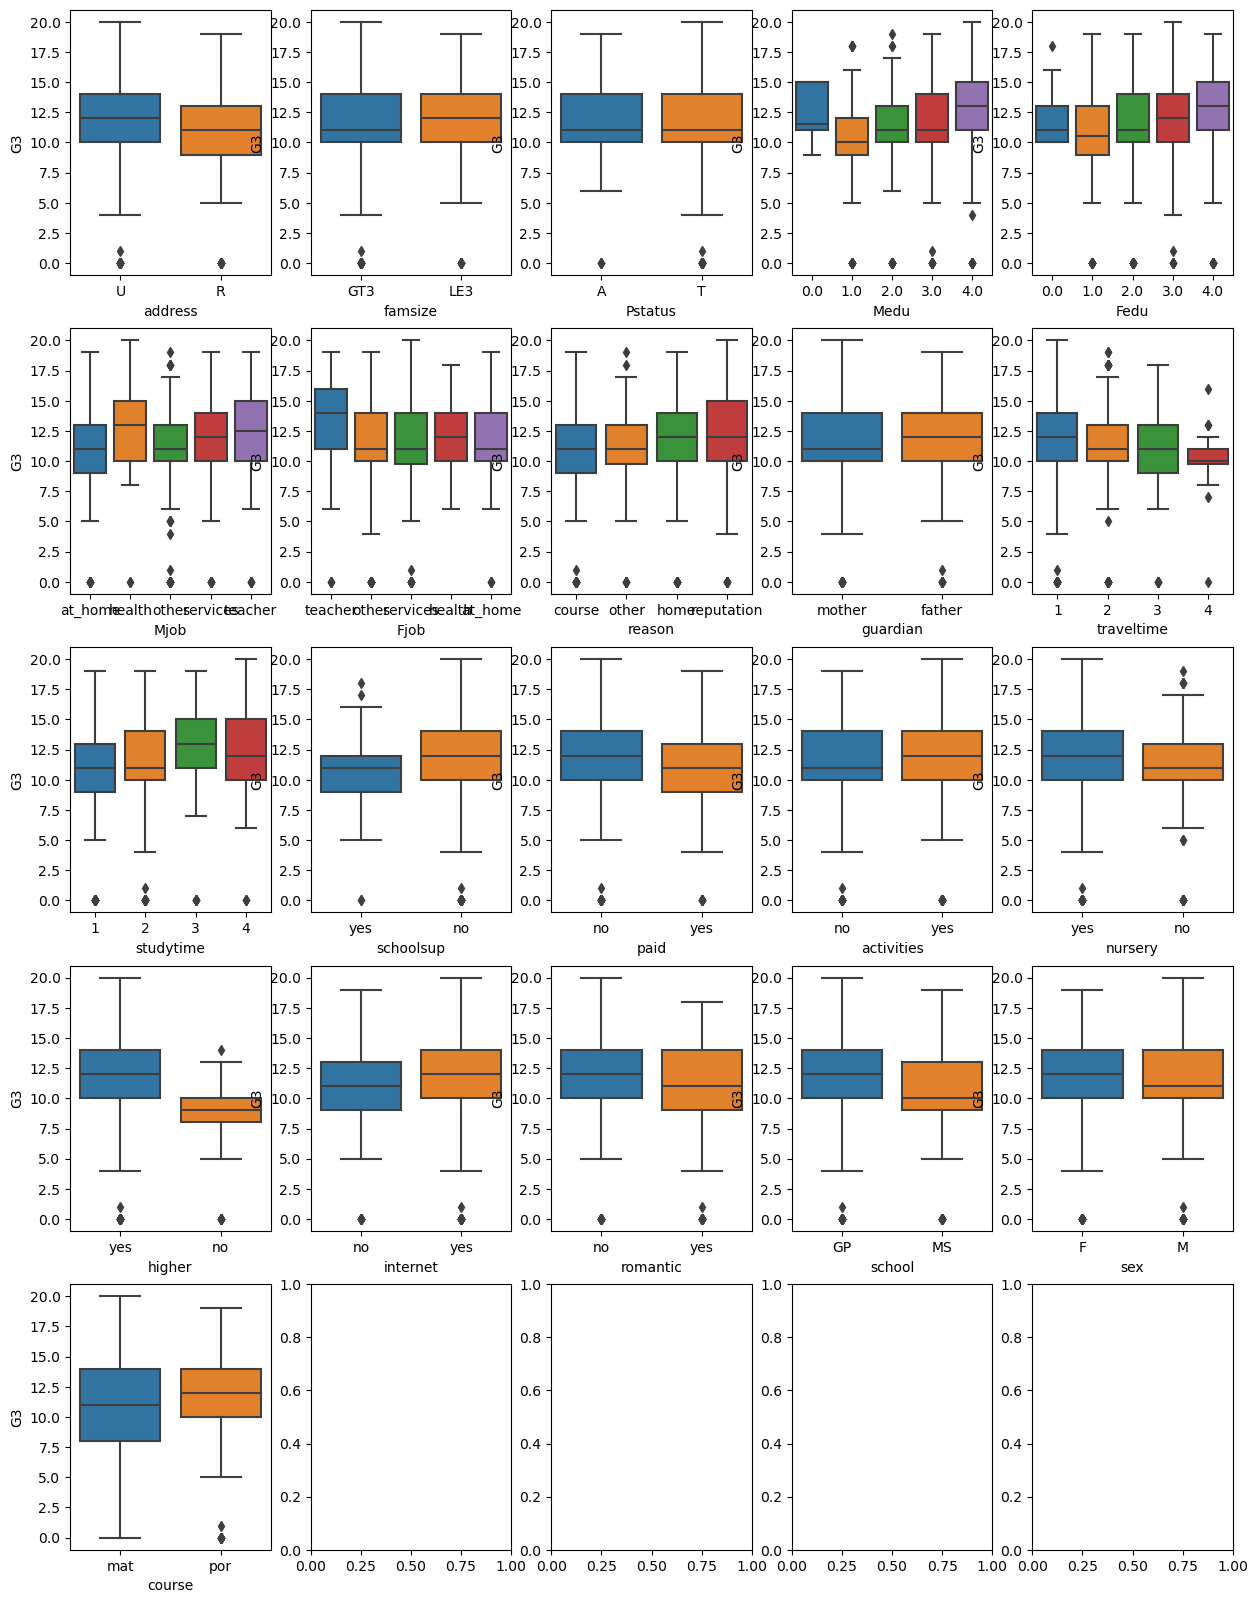

In [23]:
plot_y_dependencies(student_performance_GV_data, categorisch_var, var_type="cat", remove_outliers=True)

We zien dat het mediaan bij veel variabelen ongeveer even hoog is en dat de min en max ook ongeveer even hoog zijn. 

In [24]:
kruskal_stats = []
kruskal_ps = []

for cat_var in categorisch_var:
    groups = [student_performance_GV_data[student_performance_GV_data[cat_var] == val]["G3"] 
              for val in student_performance_GV_data[cat_var].unique()]
    groups = [group for group in groups if len(group) >= 5]

    if len(groups) > 1:
        stat, p = stats.kruskal(*groups)
        kruskal_stats.append(stat)
        kruskal_ps.append(p)

kruskal_df = pd.DataFrame({"Variabele": categorisch_var, "Stat": kruskal_stats, "p-waarde": kruskal_ps})

kruskal_df_sorted = kruskal_df.sort_values("p-waarde")

In [25]:
print(kruskal_df_sorted)

     Variabele       Stat      p-waarde
15      higher  73.665045  9.256365e-18
3         Medu  61.627772  1.319216e-12
10   studytime  40.101378  1.014069e-08
5         Mjob  38.721948  7.951230e-08
18      school  27.444363  1.616794e-07
20      course  27.085384  1.946642e-07
4         Fedu  36.298564  2.512000e-07
0      address  18.622189  1.593549e-05
7       reason  22.495654  5.143721e-05
11   schoolsup  15.968400  6.440868e-05
16    internet  15.707500  7.393043e-05
6         Fjob  19.932421  5.149752e-04
9   traveltime  16.123475  1.069762e-03
12        paid   5.602208  1.793786e-02
17    romantic   5.418421  1.992537e-02
13  activities   3.051725  8.065143e-02
19         sex   2.096145  1.476711e-01
14     nursery   1.967977  1.606628e-01
8     guardian   1.599526  2.059704e-01
1      famsize   1.568134  2.104782e-01
2      Pstatus   0.549835  4.583851e-01


De uitgevoerde Kruskal-Wallis tests hebben als doel om te onderzoeken of er significante verschillen zijn in de gemiddelde rangordes van de eindexamenscores (G3) tussen verschillende categorieën van de categorische variabelen. Hier zijn de belangrijkste interpretaties:

1. Higher (p-waarde: 9.26e-18): Er is significant bewijs dat het niveau van het beoogde hoger onderwijs (higher) invloed heeft op de eindexamenscores. Dit impliceert dat studenten met een hoger onderwijsniveau waarschijnlijk verschillende gemiddelde eindexamenscores hebben.


2. Medu (p-waarde: 1.32e-12): Er is sterk bewijs dat het opleidingsniveau van de moeder (Medu) van invloed is op de eindexamenscores.


3. Studytime (p-waarde: 1.01e-08): De studietijd per week (studytime) vertoont significant verschil in de gemiddelde rangordes van de eindexamenscores.


4. Mjob (p-waarde: 7.95e-08): Het beroep van de moeder (Mjob) heeft een significant effect op de eindexamenscores.


5. School (p-waarde: 1.62e-07): De school waartoe de student behoort (school) vertoont een significant verschil in de gemiddelde eindexamenscores.


6. Course (p-waarde: 1.95e-07): Het gekozen vakkenpakket (course) heeft significant effect op de eindexamenscores.

De p-waarden van de overige variabelen geven de mate van significantie aan. Lage p-waarden (minder dan 0.05) suggereren dat de variabele waarschijnlijk een effect heeft op de eindexamenscores. Hogere p-waarden geven minder bewijs voor significante verschillen aan.

# 7) Conclusie

Na een uitgebreide verkenning en analyse van de dataset met studentenprestaties, kunnen we de volgende conclusies trekken:

1. Er waren enkele missende waarden in de dataset, met name in de variabelen leeftijd (age), moeders opleiding (Medu), vaders opleiding (Fedu), en voogd (guardian). Deze zijn opgevuld met statistische maatregelen om de integriteit van de data te behouden.


2. We hebben de verdelingen van numerieke variabelen geanalyseerd en correlaties tussen variabelen onderzocht. Er is een sterke positieve correlatie tussen de eindexamenscores (G1, G2, G3), wat aangeeft dat studenten die goed presteren in de eerste twee termijnen waarschijnlijk ook goed zullen presteren in de uiteindelijke eindexamens.


3. Categorische variabelen: De impact van verschillende categorische variabelen op de eindexamenscores is onderzocht. Significante verschillen zijn gevonden in variabelen zoals hoger onderwijsniveau (higher), moeders opleidingsniveau (Medu), studietijd (studytime), beroep van de moeder (Mjob), school, en het gekozen vakkenpakket (course).

Daarnaast hebben we ontdekt dat bepaalde levensstijlfactoren en persoonlijke kenmerken van invloed kunnen zijn op de eindexamenscores. Zo laten de analyses zien dat een hoger aantal eerdere mislukkingen, frequent alcoholgebruik (zowel dagelijks als in het weekend), vaker uitgaan met vrienden, oudere leeftijd, meer gemiste schooldagen, minder vrije tijd, en slechtere gezondheid allemaal zwakke tot matige negatieve correlaties vertonen met de eindexamenscores. 

Daarentegen lijken betere familierelaties een zwak positief verband te hebben met hogere scores. Deze inzichten kunnen bijdragen aan een dieper begrip van de factoren die van invloed zijn op studentenprestaties en bieden mogelijk aanknopingspunten voor verdere interventies of begeleiding.